# Assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
local_img_path = 'scn_image.jpeg'

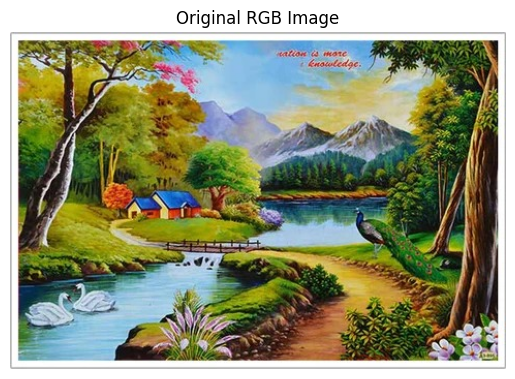

In [3]:
img_bgr = cv2.imread(local_img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

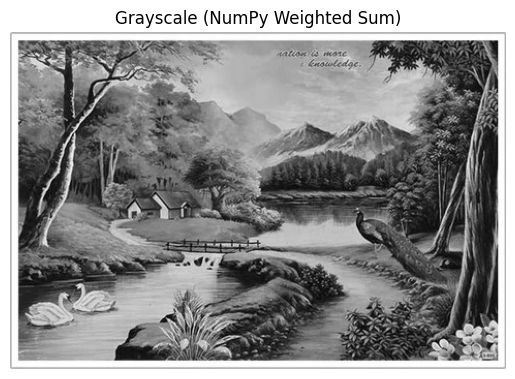

In [4]:
rgb_float = img_rgb.astype(np.float32)

# Grayscale (NumPy weighted sum)
weights = np.array([0.299, 0.587, 0.114], dtype=np.float32)
gray_np = np.clip(np.dot(rgb_float, weights), 0, 255).astype('uint8')

 # Then we Convert back to uint8 (0–255 range)
gray = gray_np.astype(np.uint8)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale (NumPy Weighted Sum)")
plt.axis("off")
plt.show()

In [5]:
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)   

    # Count pixel occurrences as these two loops visit each pixel in the image
    for i in range(gray_img.shape[0]):  # Outer loop → rows
        for j in range(gray_img.shape[1]):  # Inner loop → columns
            pixel = gray_img[i, j]    # grayscale pixel Extracts the pixel value at row i, column j.  Since this is grayscale, the value is an integer between 0–255.
            hist[pixel] += 1

    return hist


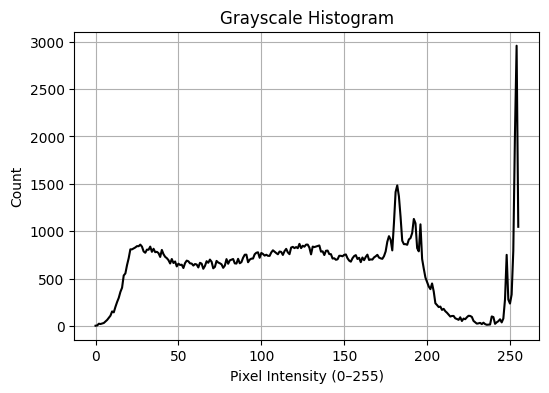

In [6]:
hist_gray = gray_histogram(gray_np)

plt.figure(figsize=(6,4))
plt.plot(hist_gray, color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [7]:
def rgb_histogram(img_rgb):
    
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]

    # Histogram arrays
    hist_R = np.zeros(256, dtype=int)
    hist_G = np.zeros(256, dtype=int)
    hist_B = np.zeros(256, dtype=int)

    rows, cols, _ = img_rgb.shape
    for i in range(rows):
        for j in range(cols):
            r = R[i, j]
            g = G[i, j]
            b = B[i, j]

            hist_R[r] += 1
            hist_G[g] += 1
            hist_B[b] += 1

    return hist_R, hist_G, hist_B


- At first it Separates R, G, B channels from an RGB image
- Then Creates three histograms — one for each channel
- Running Loop through every pixel
- Counts the number of pixels having intensity 0–255 in each channel
- Plots all three histograms together

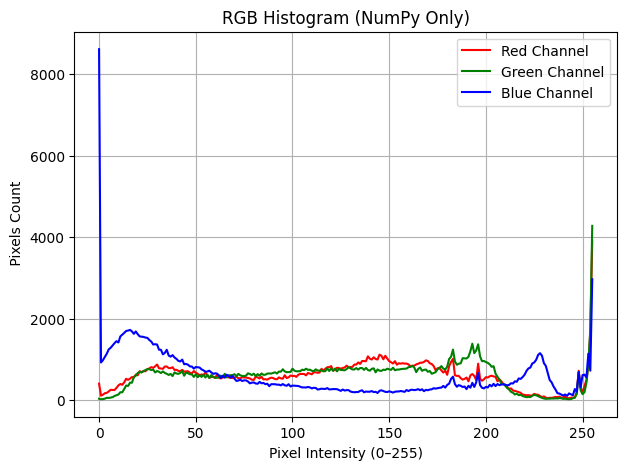

In [8]:
hist_R, hist_G, hist_B = rgb_histogram(img_rgb)

plt.figure(figsize=(7,5))
plt.plot(hist_R, color='red', label='Red Channel')
plt.plot(hist_G, color='green', label='Green Channel')
plt.plot(hist_B, color='blue', label='Blue Channel')

plt.title("RGB Histogram (NumPy Only)")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel(" Pixels Count")
plt.legend()
plt.grid(True)
plt.show()



# Part B

Part B
* RGB to HSV ( only Numpy ofc )
* Write a function rgb_to_hsv that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

- Note : Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

* The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc. Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [9]:
def rgb_to_hsv(img_rgb):
  
    img = img_rgb.astype(np.float32)
    R = img[:, :, 0] / 255.0
    G = img[:, :, 1] / 255.0
    B = img[:, :, 2] / 255.0

    C_max = np.maximum(np.maximum(R, G), B)
    C_min = np.minimum(np.minimum(R, G), B)
    diff = C_max - C_min

    H = np.zeros_like(C_max)
    S = np.zeros_like(C_max)
    V = C_max.copy()    # Value calculation is simply the maximum of R, G, B

    # Hue calculation and we know it depends on which channel is max
    mask = diff != 0

    # For pixels where R is max
    mask_r = (C_max == R) & mask
    H[mask_r] = (60 * ((G[mask_r] - B[mask_r]) / diff[mask_r])) % 360

    # Where G is max
    mask_g = (C_max == G) & mask
    H[mask_g] = (60 * ((B[mask_g] - R[mask_g]) / diff[mask_g]) + 120) % 360

    # Where B is max
    mask_b = (C_max == B) & mask
    H[mask_b] = (60 * ((R[mask_b] - G[mask_b]) / diff[mask_b]) + 240) % 360

    S[C_max != 0] = diff[C_max != 0] / C_max[C_max != 0]    #Saturation calculation

    # Then Convert it to OpenCV scale
    H = (H / 2).astype(np.uint8)       # OpenCV hue range → 0–179
    S = (S * 255).astype(np.uint8)     # Saturation 0–255
    V = (V * 255).astype(np.uint8)     # Value 0–255

    hsv = np.stack([H, S, V], axis=2)
    return hsv

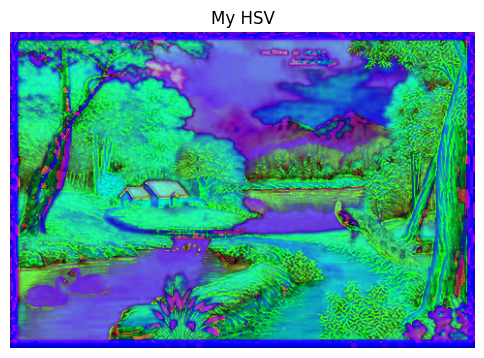

In [10]:
hsv_my = rgb_to_hsv(img_rgb)

# Convert back using OpenCV
rgb_reconstructed = cv2.cvtColor(hsv_my, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(6,6))
plt.imshow(hsv_my)
plt.title("My HSV")
plt.axis("off")
plt.show()


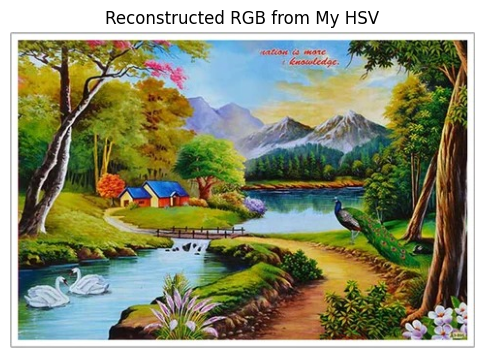

In [11]:
hsv_my = rgb_to_hsv(img_rgb)

# Convert back using OpenCV
rgb_reconstructed = cv2.cvtColor(hsv_my, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(6,6))
plt.imshow(rgb_reconstructed)
plt.title("Reconstructed RGB from My HSV")
plt.axis("off")
plt.show()

# Part C

Create 2 filters.
- Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
- Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
- Comment your code showing where you implemented what part of your filter
- The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
- Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )
* IMPORTANT FILTER DESIGN NOTES :

* The filter must include at least two color modifications, such as:

1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing
10. Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:

why you chose those modifications
why they suit the image

In [12]:

def Sasta_Lightroom(img_rgb):
    img = img_rgb.astype(np.float32)

    # Brightness increase (+40)
    img += 40

    # 2. Warm tint:
    img[:, :, 0] -= 10   # Blue
    img[:, :, 2] += 20   # Red

    # Boosted the Saturation +25%
    # And then convert to HSV, modify S
    hsv = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:, :, 1] *= 1.25   # Increase saturation
    hsv[:, :, 1] = np.clip(hsv[:, :, 1], 0, 255)

    # Converting it back to RGB
    final_img = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    return final_img

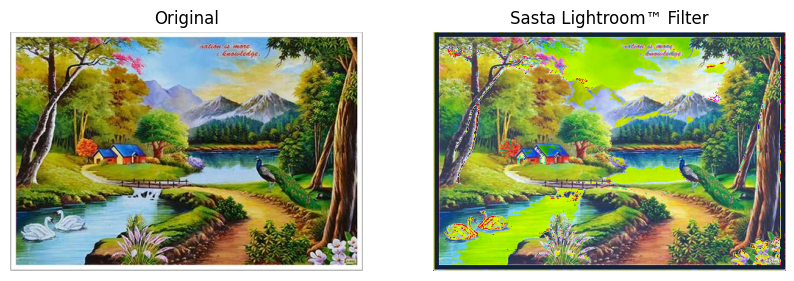

In [13]:
result1 = Sasta_Lightroom(img_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result1)
plt.title("Sasta Lightroom™ Filter")
plt.axis("off")
plt.show()


In [14]:
def Shimla_Fog_Filter(img_rgb):
    img = img_rgb.astype(np.float32)

    # Lower contrast: blend image with gray
    gray_level = 180
    img = 0.7 * img + 0.3 * gray_level

    # Slight desaturation -20%
    hsv = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:, :, 1] *= 0.80
    hsv[:, :, 1] = np.clip(hsv[:, :, 1], 0, 255)

    # Blue-gray fog tint
    img2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)
    img2[:, :, 0] += 20   # Blue
    img2[:, :, 1] += 10   # Green

    # Gamma correction (<1 makes image softer)
    gamma = 0.8
    img_norm = img2 / 255.0
    img_gamma = np.power(img_norm, gamma) * 255

    final_img = np.clip(img_gamma, 0, 255).astype(np.uint8)
    return final_img

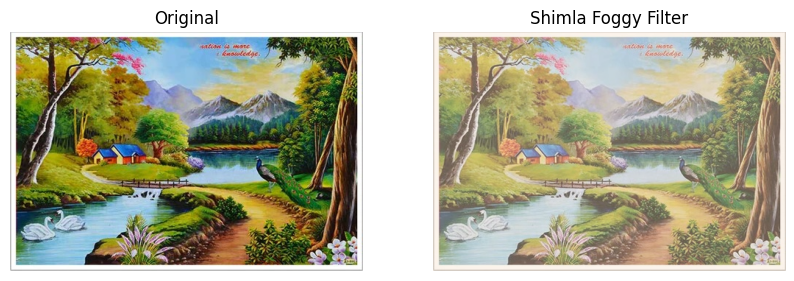

In [15]:
result2 = Shimla_Fog_Filter(img_rgb)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result2)
plt.title("Shimla Foggy Filter")
plt.axis("off")

plt.show()


# Part D

White Balance Function
- Write a function white_patch_balance(img_rgb) that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [16]:
 # This finds the brightest pixel in each channel and scales the image so that the brightest value becomes 255.
def white_patch_balance(img_rgb):

    img = img_rgb.astype(np.float32)

    # Max pixel in each channel
    max_R = np.max(img[:, :, 0])
    max_G = np.max(img[:, :, 1])
    max_B = np.max(img[:, :, 2])

    # This avoids division by zero
    max_R = max_R if max_R > 0 else 1
    max_G = max_G if max_G > 0 else 1
    max_B = max_B if max_B > 0 else 1

    # Scale channels so brightest becomes 255
    img[:, :, 0] = img[:, :, 0] * (255.0 / max_R)   # Red
    img[:, :, 1] = img[:, :, 1] * (255.0 / max_G)   # Green
    img[:, :, 2] = img[:, :, 2] * (255.0 / max_B)   # Blue

    # Then Clip values back to valid range
    img = np.clip(img, 0, 255).astype(np.uint8)

    return img

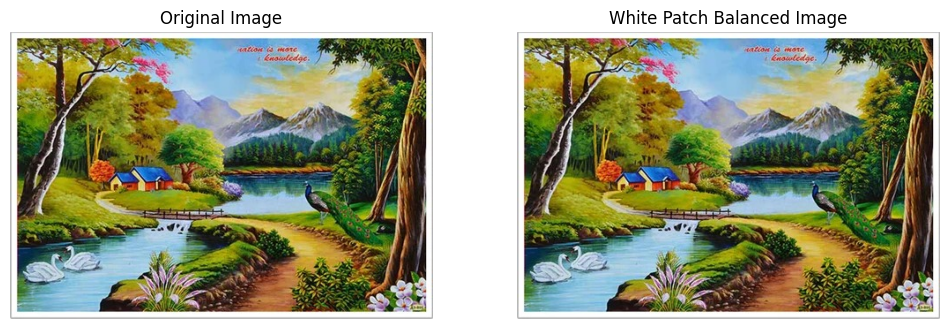

In [17]:
wb_img = white_patch_balance(img_rgb)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wb_img)
plt.title("White Patch Balanced Image")
plt.axis("off")

plt.show()